<a href="https://colab.research.google.com/github/Luna-luv/Kaggle_Study/blob/main/Rain%20in%20Australia/Untitled19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/weatherAUS.csv'

# Importing libraries


### from keras.layers import ...
- `dense` : ÏôÑÏ†Ñ Ïó∞Í≤∞ Ï∏µ
- `BatchNormalization` : Î∞∞Ïπò Ï†ïÍ∑úÌôî, ÌïôÏäµ ÏïàÏ†ïÌôî Î∞è ÏÜçÎèÑ Ìñ•ÏÉÅ
- `Dropout` : Í≥ºÏ†ÅÌï© Î∞©ÏßÄÎ•º ÏúÑÌïú ÎÖ∏Îìú Î¨¥ÏûëÏúÑ Ï†úÍ±∞
- `LSTM` : ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞ Ï≤òÎ¶¨Ïóê Í∞ïÌïú ÏàúÌôòÏã†Í≤ΩÎßùÏùò Ìïú Ï¢ÖÎ•ò

```python
from keras.models import Sequential
```
Î™®Îç∏ÏùÑ ÏàúÏ∞®Ï†ÅÏúºÎ°ú ÏåìÎäî Íµ¨Ï°∞Î•º ÎßåÎì§ Îïå ÏÇ¨Ïö©

```python
from keras.utils import to_categorical
```
Î†àÏù¥Î∏îÏùÑ Ïõê-Ìï´ Ïù∏ÏΩîÎî© ÌòïÏãùÏúºÎ°ú Î≥ÄÌôò

```python
from tensorflow.keras import regularizers
```
Í≥ºÏ†ÅÌï© Î∞©ÏßÄÎ•º ÏúÑÌïú Ï†ïÍ∑úÌôî(L1, L2)Î•º ÏÑ§Ï†ïÌï† Îïå ÏÇ¨Ïö©

```python
from sklearn.metrics import...
```
Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï† Îïå ÏÇ¨Ïö©

```python
from keras import callbacks
```
ÌïôÏäµ ÎèÑÏ§ë ÌäπÏ†ï Ï°∞Í±¥ÏùÑ ÎßåÏ°±Ìï† Îïå Ï§ëÎã®, Ï†ÄÏû•, Î°úÍπÖ Îì± ÏûêÎèôÌôî Í∞ÄÎä•

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

# Loading data

In [5]:
data = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Data Visualization and Cleaning
steps involved in this section :
- count plot of target column
- correlation amongst numeric attributes
- parse dates into datetime
- encoding days and months as continuous cyclic features

<ipython-input-7-2f346c1e6684>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["RainTomorrow"], palette= cols)


<Axes: xlabel='RainTomorrow', ylabel='count'>

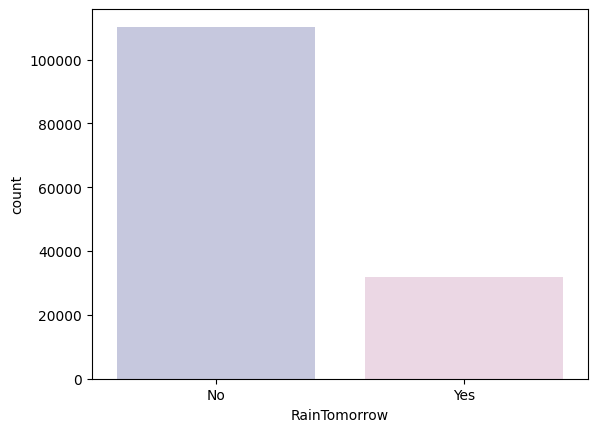

In [7]:
cols = ["#C2C4E2","#EED4E5"]
sns.countplot(x=data["RainTomorrow"], palette= cols)

In [8]:
numeric_data = data.select_dtypes(include=['number'])

```python
cmap = sns.diverging_palette(260, -10, s=50, l=75, n=6, as_cmap=True)
```
`diverging_palette()` : ÏñëÏ™ΩÏúºÎ°ú Î∂ÑÍ∏∞Îêú ÏÉâÏÉÅ Ïä§ÌéôÌä∏ÎüºÏùÑ ÎßåÎì§Ïñ¥Ï§å
- `260, -10` : ÏÉâÏÉÅ ÏãúÏûëÏ†êÍ≥º ÎÅùÏ†ê(Hue Í∞í)
- `s=50` : Ï±ÑÎèÑ(saturation)
- `l=75` : Î™ÖÎèÑ(lightness)
- `n=6` : Îã®Í≥Ñ Ïàò(ÏÉâÏÉÅÏùò Í∞úÏàò)
- `as_cmap=True` : colormap ÌòïÌÉúÎ°ú Î≥ÄÌôò(heatmap Ïóê Î∞îÎ°ú ÏÇ¨Ïö© Í∞ÄÎä•)

<Axes: >

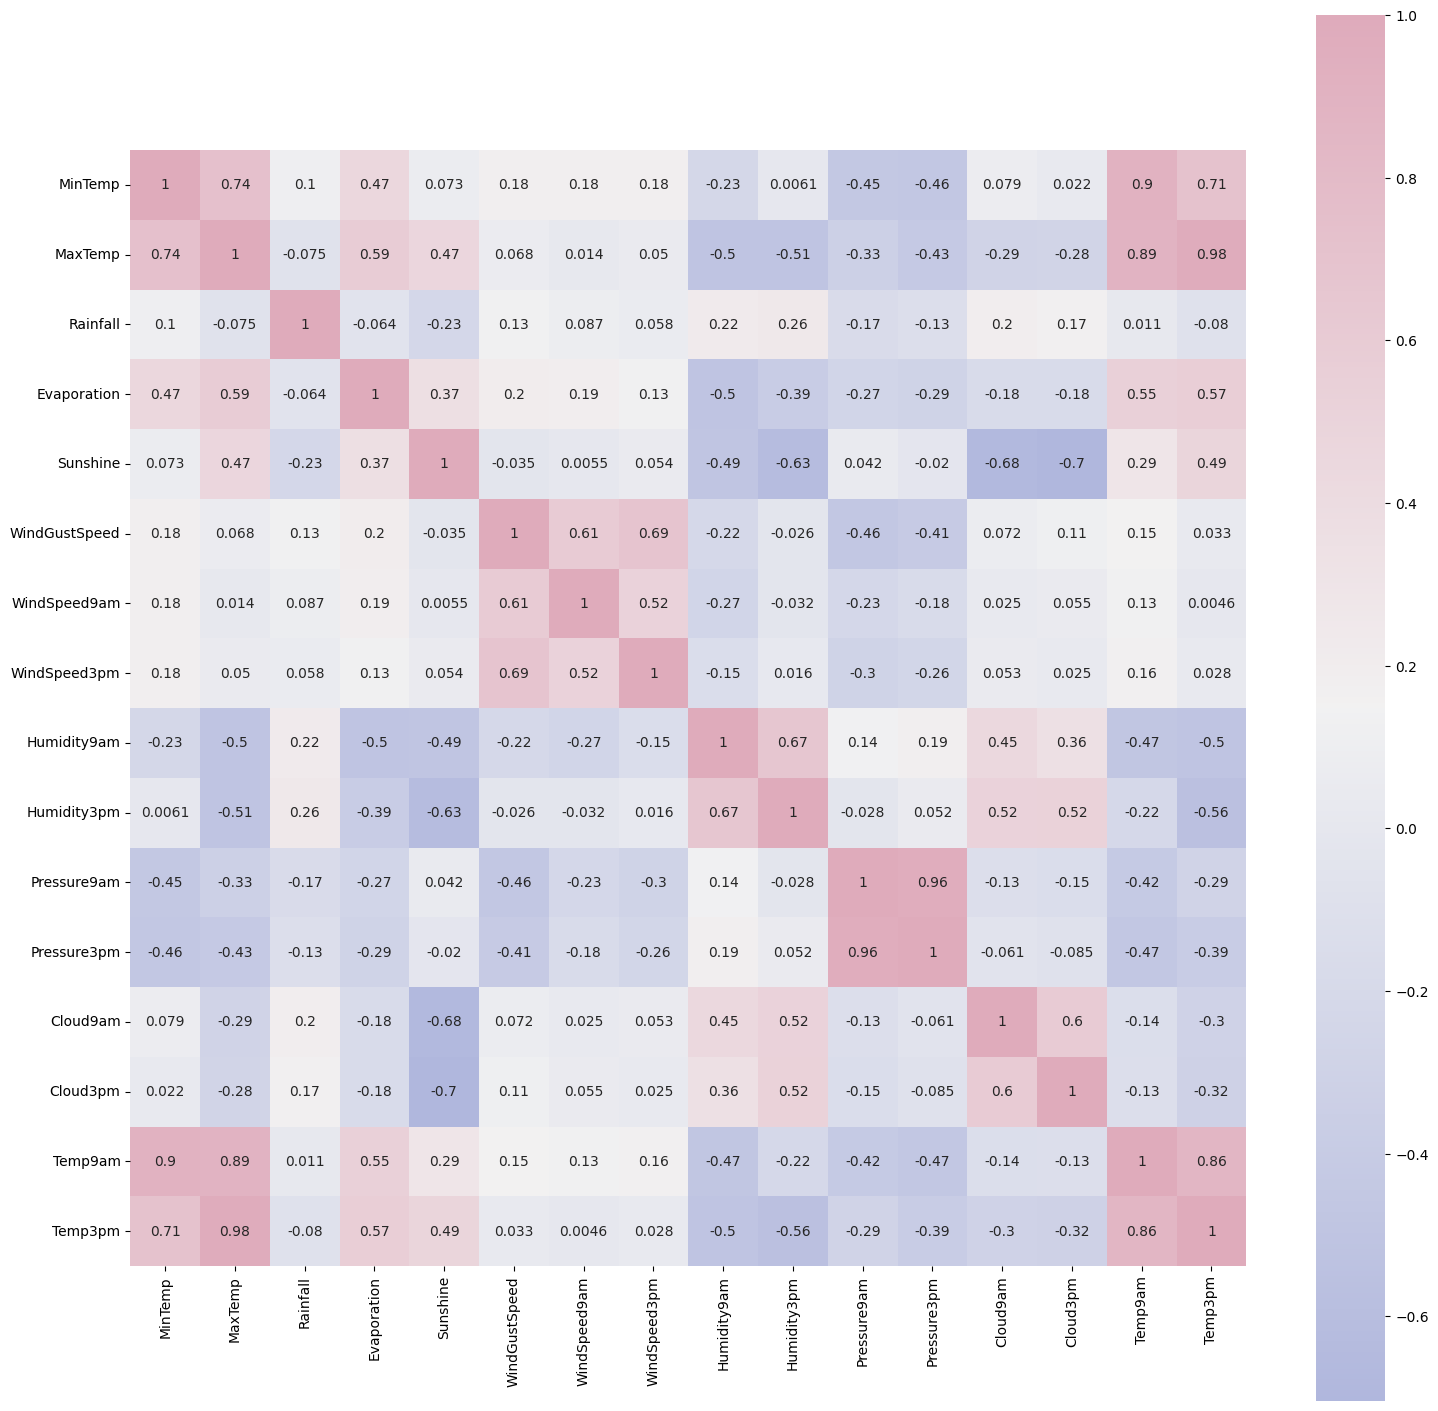

In [9]:
corrmat = numeric_data.corr()
cmap = sns.diverging_palette(260,-10,s=50, l=75, n=6, as_cmap=True)
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True)

In [10]:
lengths = data["Date"].str.len()
lengths.value_counts()

Date
10    145460
Name: count, dtype: int64

```
date Îç∞Ïù¥ÌÑ∞ Í∏∏Ïù¥ ÌôïÏù∏ Í≤∏ Ïò§Î•ò ÏóÜÏùåÏùÑ ÌôïÏù∏Ìï®
```

In [11]:
data['Date']= pd.to_datetime(data["Date"]) # Î¨∏ÏûêÏó¥ÏùÑ datetime Í∞ùÏ≤¥Î°ú Î≥ÄÌôò
data['year'] = data.Date.dt.year

In [12]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [13]:
data['month'] = data.Date.dt.month
data = encode(data, 'month', 12)

data['day'] = data.Date.dt.day
data = encode(data, 'day', 31)

data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0 2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1 2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2 2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3 2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4 2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Temp3pm  RainToday  RainTomorrow  \
0           W           44.0          W  ...    21.8         No            No   
1         WNW           44.0        NNW  ...    24.3         No            No   
2         WSW           46.0          W  ...    23.2         No            No   
3          NE           24.0         SE  ...    26.5         No            No   
4           W           41.0        ENE  ...    29.7         No            No   

   year  month     month_sin  month_cos  day   day_sin   day_cos  
0  2008     12 -2.449294e-16        1.0    1  0.201299  0.979530  
1  2008     12 -2.449294e-16        1.0    2  0.394356  0.918958  
2  2008     12 -2.449294e-16        1.0    3  0.571268  0.820763  
3  2008     12 -2.449294e-16        1.0    4  0.724793  0.688967  
4  2008     12 -2.449294e-16        1.0    5  0.848644  0.528964  

[5 rows x 30 columns]

Text(0.5, 0, 'Days In Year')

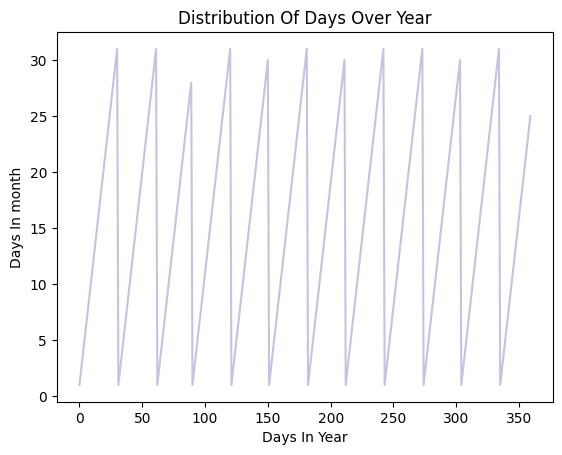

In [14]:
section = data[:360]
tm = section["day"].plot(color="#C2C4E2")
tm.set_title("Distribution Of Days Over Year")
tm.set_ylabel("Days In month")
tm.set_xlabel("Days In Year")

Text(0.5, 0, 'Sine Encoded Months')

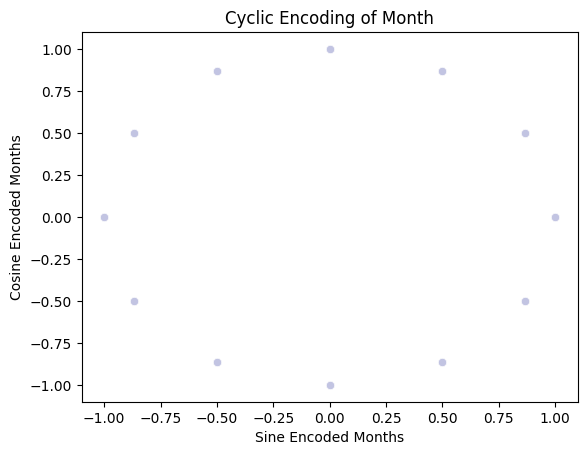

In [15]:
cyclic_month = sns.scatterplot(x="month_sin",y="month_cos",data=data, color="#C2C4E2")
cyclic_month.set_title("Cyclic Encoding of Month")
cyclic_month.set_ylabel("Cosine Encoded Months")
cyclic_month.set_xlabel("Sine Encoded Months")

Text(0.5, 0, 'Sine Encoded Day')

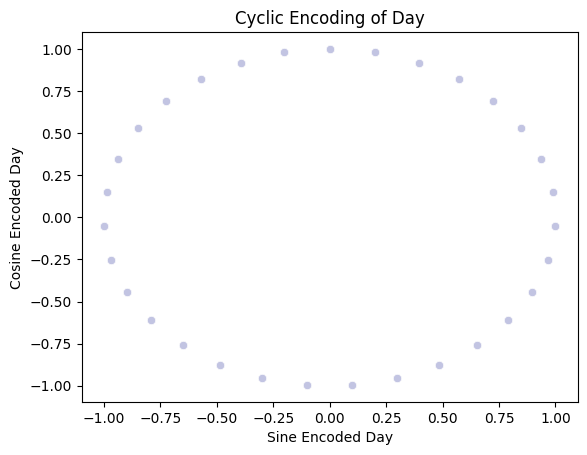

In [16]:
cyclic_day = sns.scatterplot(x='day_sin',y='day_cos',data=data, color="#C2C4E2")
cyclic_day.set_title("Cyclic Encoding of Day")
cyclic_day.set_ylabel("Cosine Encoded Day")
cyclic_day.set_xlabel("Sine Encoded Day")

## Categorical variables
filling missing values with mode of the column value

In [19]:
s = (data.dtypes == "object")
object_cols = list(s[s].index)
print("Categorical variables :")
print(object_cols)

Categorical variables :
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [20]:
for i in object_cols:
  print(i, data[i].isnull().sum())

Location 0
WindGustDir 10326
WindDir9am 10566
WindDir3pm 4228
RainToday 3261
RainTomorrow 3267


In [21]:
for i in object_cols:
  data[i].fillna(data[i].mode()[0], inplace=True)

<ipython-input-21-ebc27958d453>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].mode()[0], inplace=True)


## Numerical variables
filling missing values with median of the column value

In [23]:
t = (data.dtypes == "float64")
num_cols = list(t[t].index)

print("Numeric variables:")
print(num_cols)

Numeric variables:
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'month_sin', 'month_cos', 'day_sin', 'day_cos']


In [24]:
for i in num_cols:
  print(i, data[i].isnull().sum())


MinTemp 1485
MaxTemp 1261
Rainfall 3261
Evaporation 62790
Sunshine 69835
WindGustSpeed 10263
WindSpeed9am 1767
WindSpeed3pm 3062
Humidity9am 2654
Humidity3pm 4507
Pressure9am 15065
Pressure3pm 15028
Cloud9am 55888
Cloud3pm 59358
Temp9am 1767
Temp3pm 3609
month_sin 0
month_cos 0
day_sin 0
day_cos 0


In [25]:
for i in num_cols:
  data[i].fillna(data[i].median(), inplace=True)

data.info()

<ipython-input-25-990fdce1f8e2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].fillna(data[i].median(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  object        
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  object        
 10  WindDir3pm     145460 non-null  object        
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

# Data Preprocessing
steps involved in data preprocessing:
- label encoding coulumns with categorical data
- perform the scaling of the features
- detecting outliers
- dropping the outliers based on data analysis

## label encoding the categorical variable

`sklearn.preprocessing.LabelEncoder`Î•º ÏÇ¨Ïö©Ìï¥ÏÑú Î¨∏Ïûê(Î≤îÏ£ºÌòï)Î•º Ï†ïÏàòÍ∞íÏúºÎ°ú Îß§ÌïëÌïòÎäî Í∞ùÏ≤¥ ÏÉùÏÑ±
- `fit_transform()` ÏúºÎ°ú Î¨∏Ïûê -> Ï†ïÏàò Î≥ÄÌôò

### Ïôú ÌïòÎäîÍ∞Ä??
- Î®∏Ïã†Îü¨Îãù/Ïã†Í≤ΩÎßù Î™®Îç∏ÏùÄ Î¨∏ÏûêÎÇò Î¨∏ÏûêÏó¥ÏùÑ ÏßÅÏ†ë Ï≤òÎ¶¨ÌïòÏßÄ Î™ªÌïòÍ∏∞ ÎïåÎ¨∏Ïóê **Ï†ïÏàòÎÇò Î≤°ÌÑ∞**Î°ú Ïù∏ÏΩîÎî© ÂøÖ

‚ö†Ô∏è `LabelEncoder`Îäî Ïà´ÏûêÏóê ÏàúÏÑúÎ•º Î∂ÄÏó¨Ìï¥Î≤ÑÎ¶º -> **ÏÑúÏó¥ Í¥ÄÍ≥ÑÍ∞Ä ÏóÜÎäî Î≤îÏ£ºÌòï Î≥ÄÏàò ÏÇ¨Ïö©Ïãú Ï£ºÏùò**
- ex. red -> 0, blue -> 1, green -> 2 Ïù¥Î©¥ greenÏù¥ ÌÅ¨Í≥† redÍ∞Ä ÏûëÏùÄ Í≤ÉÏ≤òÎüº Ïù∏ÏãùÎê®. Í∑∏Îü¨ÎÇò Ïã§Ï†ú ÏÉâÍπîÏóêÎäî ÏàúÏÑúÍ∞Ä ÏóÜÏùå
=> Ïù¥ Í≤ΩÏö∞ `pd.get_dummies()`ÎòêÎäî `OneHotEncoder`Î•º ÏÇ¨Ïö©ÌïòÎäî Í≤ÉÏù¥ ÎÇòÏùÑ Ïàò ÏûàÏùå(Î™®Îì† Í∞íÏù¥ 0, 1Î°úÎßå ÌëúÌòÑÎêòÍ∏∞ ÎïåÎ¨∏)

‚ùìÍ∑∏Îüº Ïôú ÌïÑÏûêÎäî LabelEncoderÎ•º ÏÇ¨Ïö©ÌïòÏòÄÎäîÍ∞Ä

1) ANNÏùÄ..
- Í∞Å Í∞íÏùÑ embeddingÏ≤òÎüº Ï≤òÎ¶¨(Î≤°ÌÑ∞ÌôîÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Ïà´ÏûêÎäî Îã®ÏàúÌûà Ïù∏Îç±Ïä§Ïùº Îøê ÏÑúÏó¥Ïùò ÏùòÎØ∏Í∞Ä ÎØ∏ÎØ∏Ìï¥Ïßê)
- ÎÇ¥Î∂ÄÏ†ÅÏúºÎ°ú ÎπÑÏÑ†Ìòï Î≥ÄÌôòÏù¥ Îì§Ïñ¥Í∞ÄÏÑú 0, 1, 2 ÏÇ¨Ïù¥Ïùò Îã®ÏàúÌïú ÏàòÏπòÏ†Å Ï∞®Ïù¥Í∞Ä ÌÅ¨Í≤å ÏùòÎØ∏ ÏóÜÏùÑ Ïàò ÏûàÏùå
- ÌäπÌûà Î≤îÏ£º ÏàòÍ∞Ä Ï†ÅÍ≥† Î™®Îç∏Ïù¥ ÍπäÎã§Î©¥ Ïù¥ Ìö®Í≥ºÎäî Îçî ÎØ∏ÎØ∏

2) Î≤îÏ£º ÏàòÍ∞Ä ÎÑàÎ¨¥ ÎßéÍ±∞ÎÇò Ìù¨ÏÜåÌïú Í≤ΩÏö∞ **one-hot ÏùÄ ÎÑàÎ¨¥ ÎπÑÌö®Ïú®Ï†Å**
-> Ïù¥ Í≤ΩÏö∞ LabelEncoder + Embedding layer Í∞Ä Îçî Ìö®Ïú®Ï†Å

3) Î™®Îç∏ Ìä∏Î¶¨ Í∏∞Î∞òÏù¥ ÏïÑÎãå Îî•Îü¨ÎãùÏù¥Í∏∞Ïóê
- Ìä∏Î¶¨ Î™®Îç∏ÏùÄ **Ïà´Ïûê Í∞Ñ ÎπÑÍµê Ïó∞ÏÇ∞**ÏùÑ ÌïòÎØÄÎ°ú LabelEncoderÍ∞Ä ÏûòÎ™ªÎêú ÏàúÏÑú Ï†ïÎ≥¥Î•º Ï§Ñ Ïàò ÏûàÏùå
- ANNÏùÄ ÎπÑÍµê Ïó∞ÏÇ∞Î≥¥Îã§ **Í∞ÄÏ§ëÏπò ÌïôÏäµ**Ïóê Ï¥àÏ†êÏù¥ ÏûàÏñ¥ÏÑú Ïà´ÏûêÍ∞íÏù¥ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú Îçú Ï§ëÏöîÌï† Ïàò ÏûàÏùå

In [27]:
label_encoder = LabelEncoder()
for i in object_cols :
  data[i] = label_encoder.fit_transform(data[i])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 30 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  int64         
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   Evaporation    145460 non-null  float64       
 6   Sunshine       145460 non-null  float64       
 7   WindGustDir    145460 non-null  int64         
 8   WindGustSpeed  145460 non-null  float64       
 9   WindDir9am     145460 non-null  int64         
 10  WindDir3pm     145460 non-null  int64         
 11  WindSpeed9am   145460 non-null  float64       
 12  WindSpeed3pm   145460 non-null  float64       
 13  Humidity9am    145460 non-null  float64       
 14  Humidity3pm    145460 non-null  float64       
 15  

### Standardization Îç∞Ïù¥ÌÑ∞ ÌëúÏ§ÄÌôî Í≥ºÏ†ï
- Í∞Å Ïó¥ÏùÑ ÌèâÍ∑† 0, ÌëúÏ§ÄÌé∏Ï∞® 1Î°ú Î≥ÄÌôòÌï¥ÏÑú Ïã†Í≤ΩÎßù ÌïôÏäµÏóê Ïú†Î¶¨ÌïòÍ∏∞ Ìï®

In [29]:
features = data.drop(['RainTomorrow', 'Date', 'day', 'month'], axis=1) # target & extra columns drop
target = data['RainTomorrow']

col_names = list(features.columns)
s_scaler = preprocessing.StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names)

features.describe().T

count          mean       std       min       25%       50%  \
Location       145460.0  7.815677e-18  1.000003 -1.672228 -0.899139  0.014511   
MinTemp        145460.0 -4.501830e-16  1.000003 -3.250525 -0.705659 -0.030170   
MaxTemp        145460.0  3.001220e-16  1.000003 -3.952405 -0.735852 -0.086898   
Rainfall       145460.0  7.815677e-18  1.000003 -0.275097 -0.275097 -0.275097   
Evaporation    145460.0 -3.282584e-17  1.000003 -1.629472 -0.371139 -0.119472   
Sunshine       145460.0 -5.424080e-16  1.000003 -2.897217  0.076188  0.148710   
WindGustDir    145460.0  6.252542e-18  1.000003 -1.724209 -0.872075  0.193094   
WindGustSpeed  145460.0  1.824961e-16  1.000003 -2.588407 -0.683048 -0.073333   
WindDir9am     145460.0  7.190423e-17  1.000003 -1.550000 -0.885669  0.000105   
WindDir3pm     145460.0  8.284618e-17  1.000003 -1.718521 -0.837098  0.044324   
WindSpeed9am   145460.0  5.627287e-17  1.000003 -1.583291 -0.793380 -0.116314   
WindSpeed3pm   145460.0  6.565169e-17  1.000003 -2.141841 -0.650449  0.037886   
Humidity9am    145460.0  2.250915e-16  1.000003 -3.654212 -0.631189  0.058273   
Humidity3pm    145460.0 -8.440931e-17  1.000003 -2.518329 -0.710918  0.021816   
Pressure9am    145460.0 -4.314254e-16  1.000003 -5.520544 -0.616005 -0.006653   
Pressure3pm    145460.0  5.027043e-15  1.000003 -5.724832 -0.622769 -0.007520   
Cloud9am       145460.0 -1.016038e-16  1.000003 -2.042425 -0.727490  0.149133   
Cloud3pm       145460.0  7.346736e-17  1.000003 -2.235619 -0.336969  0.137693   
Temp9am        145460.0  7.503050e-17  1.000003 -3.750358 -0.726764 -0.044517   
Temp3pm        145460.0 -6.877796e-17  1.000003 -3.951301 -0.725322 -0.083046   
RainToday      145460.0 -8.988029e-18  1.000003 -0.529795 -0.529795 -0.529795   
year           145460.0  2.080221e-14  1.000003 -2.273637 -0.697391  0.090732   
month_sin      145460.0 -4.884798e-17  1.000003 -1.434333 -0.725379 -0.016425   
month_cos      145460.0 -2.745257e-17  1.000003 -1.388032 -1.198979  0.023080   
day_sin        145460.0  3.565903e-18  1.000003 -1.403140 -1.019170 -0.003198   
day_cos        145460.0 -1.413538e-17  1.000003 -1.392587 -1.055520 -0.044639   

                    75%        max  
Location       0.857881   1.701250  
MinTemp        0.723865   3.410112  
MaxTemp        0.703133   3.510563  
Rainfall      -0.203581  43.945571  
Evaporation    0.006361  43.985108  
Sunshine       0.257494   2.360634  
WindGustDir    1.045228   1.471296  
WindGustSpeed  0.460168   7.243246  
WindDir9am     0.885879   1.771653  
WindDir3pm     0.925747   1.586813  
WindSpeed9am   0.560752  13.086472  
WindSpeed3pm   0.611499   7.839016  
Humidity9am    0.747734   1.649338  
Humidity3pm    0.656852   2.366565  
Pressure9am    0.617561   3.471111  
Pressure3pm    0.622735   3.653960  
Cloud9am       0.587445   1.902380  
Cloud3pm       0.612356   2.036343  
Temp9am        0.699753   3.599302  
Temp3pm        0.661411   3.653834  
RainToday     -0.529795   1.887521  
year           0.878855   1.666978  
month_sin      0.692529   1.401483  
month_cos      0.728636   1.434192  
day_sin        1.012774   1.396744  
day_cos        1.011221   1.455246

### boxenplot vs boxplot
| Íµ¨Î∂Ñ         | boxplot                         | boxenplot                                |
|--------------|----------------------------------|-------------------------------------------|
| ÏöîÏïΩ Ï†ïÎ≥¥    | Ï§ëÏïôÍ∞í, ÏÇ¨Î∂ÑÏúÑÏàò, Ïù¥ÏÉÅÏπò         | Îçî ÎßéÏùÄ Î∂ÑÏúÑÏàò(quantiles)Î°ú Î∂ÑÌè¨Î•º ÏûêÏÑ∏Ìûà ÌëúÏãú |
| Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞  | ÏÜå~Ï§ëÍ∞Ñ Í∑úÎ™® Îç∞Ïù¥ÌÑ∞Ïóê Ï†ÅÌï©       | **ÌÅ∞ Í∑úÎ™® Îç∞Ïù¥ÌÑ∞**Ïóê Îçî Ïú†Î¶¨               |
| ÏãúÍ∞ÅÌôî Î∞ÄÎèÑ  | Îã®Ïàú                             | Îçî Ï†ïÎ∞ÄÌïòÍ≤å Ï∏µÌôîÎêú Íµ¨Ï°∞                    |
| Ïù¥ÏÉÅÏπò ÌëúÌòÑ  | O                                | O                                         |
| ÌôúÏö© Î™©Ï†Å    | Í∏∞Î≥∏Ï†ÅÏù∏ Î∂ÑÌè¨ ÌôïÏù∏               | **Î∂ÑÌè¨ ÌòïÌÉúÎ•º Îçî ÍπäÏù¥ Î∂ÑÏÑù**Ìï† Îïå ÏÇ¨Ïö©     |


- standardScalerÎäî Î™®Îì† ÌäπÏÑ±Ïùò Ïä§ÏºÄÏùºÏùÑ Í∞ôÍ≤å ÎßûÏ∂∞Ï§ÑÎøê, ÏôúÎèÑÎ•º Ìï¥Í≤∞Ìï¥Ï£ºÎäî Í≤ÉÏùÄ ÏïÑÎãò -> boxenplotÏùÑ ÏÇ¨Ïö©Ìï¥ outlier detect

<ipython-input-30-1ae9fffce728>:3: UserWarning: 
The palette list has fewer values (5) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


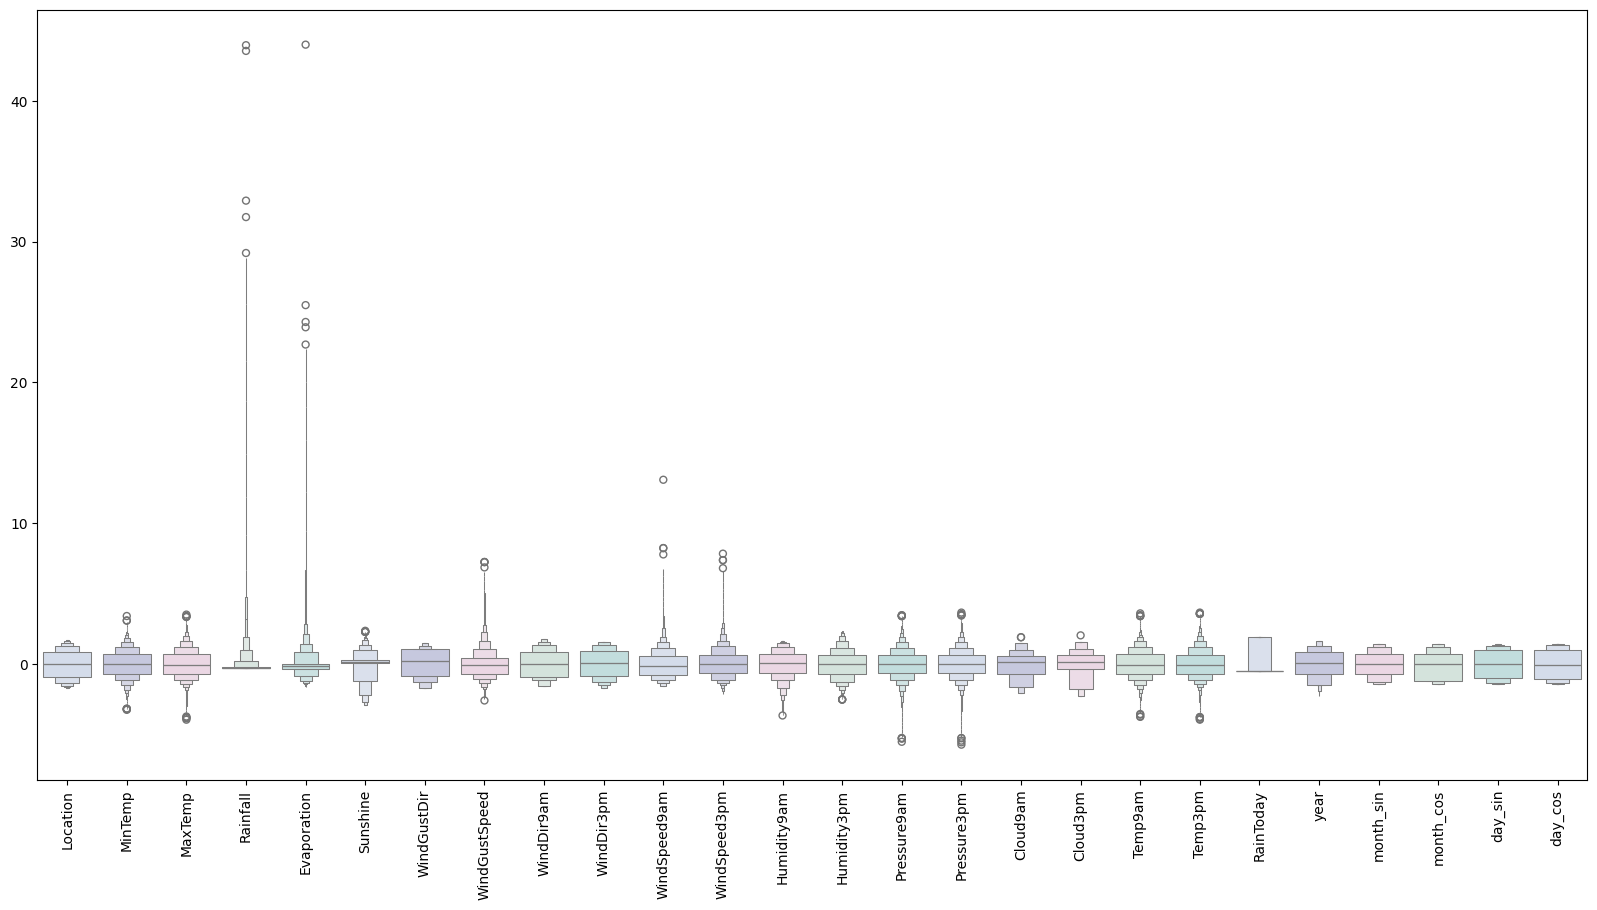

In [30]:
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

```
- Î∞ïÏä§Í∞Ä ÎëêÍ∫ºÏö∏ÏàòÎ°ù Îç∞Ïù¥ÌÑ∞Í∞Ä Ï§ëÍ∞ÑÏóê Î™∞Î†§ÏûàÍ≥†
- Î∞ïÏä§Í∞Ä ÏñáÍ≥† Í∏∏ÏàòÎ°ù Î∂ÑÏÇ∞Ïù¥ ÌÅ¨Î©∞, Ïù¥ÏÉÅÏπòÍ∞Ä ÎßéÏùå
-> rainfall, evaporation, windgustspeed(Î∞ïÏä§Í∞Ä Í∏∏Í≥† Ïù¥ÏÉÅÏπò ÎßéÏúºÎØÄÎ°ú Î∂àÍ∑†Ìòï/ÏπòÏö∞Ïπ® Ïïå Ïàò ÏûàÏùå), month_sin, day_sin, year, raintoday(Î∞ïÏä§ÎÑìÏù¥ Í∑†ÏùºÌïòÎØÄÎ°ú Ï†ïÍ∑úÎ∂ÑÌè¨Ï≤òÎüº Ïûò Î∂ÑÌè¨Îê®ÏùÑ Ïïå Ïàò ÏûàÏùå)
```

In [31]:
features["RainTomorrow"] = target

features = features[(features["MinTemp"]<2.3)&(features["MinTemp"]>-2.3)]
features = features[(features["MaxTemp"]<2.3)&(features["MaxTemp"]>-2)]
features = features[(features["Rainfall"]<4.5)]
features = features[(features["Evaporation"]<2.8)]
features = features[(features["Sunshine"]<2.1)]
features = features[(features["WindGustSpeed"]<4)&(features["WindGustSpeed"]>-4)]
features = features[(features["WindSpeed9am"]<4)]
features = features[(features["WindSpeed3pm"]<2.5)]
features = features[(features["Humidity9am"]>-3)]
features = features[(features["Humidity3pm"]>-2.2)]
features = features[(features["Pressure9am"]< 2)&(features["Pressure9am"]>-2.7)]
features = features[(features["Pressure3pm"]< 2)&(features["Pressure3pm"]>-2.7)]
features = features[(features["Cloud9am"]<1.8)]
features = features[(features["Cloud3pm"]<2)]
features = features[(features["Temp9am"]<2.3)&(features["Temp9am"]>-2)]
features = features[(features["Temp3pm"]<2.3)&(features["Temp3pm"]>-2)]

features.shape

(127536, 27)

```
ÎèôÍ∑∏ÎùºÎØ∏(Ïù¥ÏÉÅÏπò)Í∞Ä ÏûàÎäîÏï†Îì§Îßå ÎÇòÏôÄÏûàÏúºÎØÄÎ°ú ÌïÑÏûêÍ∞Ä Í∑∏ÎÉ• boxenplotÏùÑ Î≥¥Í≥† Ïà´ÏûêÎ•º ÏûÑÏùòÎ°ú Ï†ïÌïúÎìØ(ÎèôÍ∑∏ÎùºÎØ∏Î∂ÄÎ∂ÑÏù¥ ÏûòÎ¶¨ÎèÑÎ°ù)
```

boxenplot without outliers

<ipython-input-32-d3a7b3e4bca7>:2: UserWarning: 
The palette list has fewer values (5) than needed (27) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = features,palette = colours)


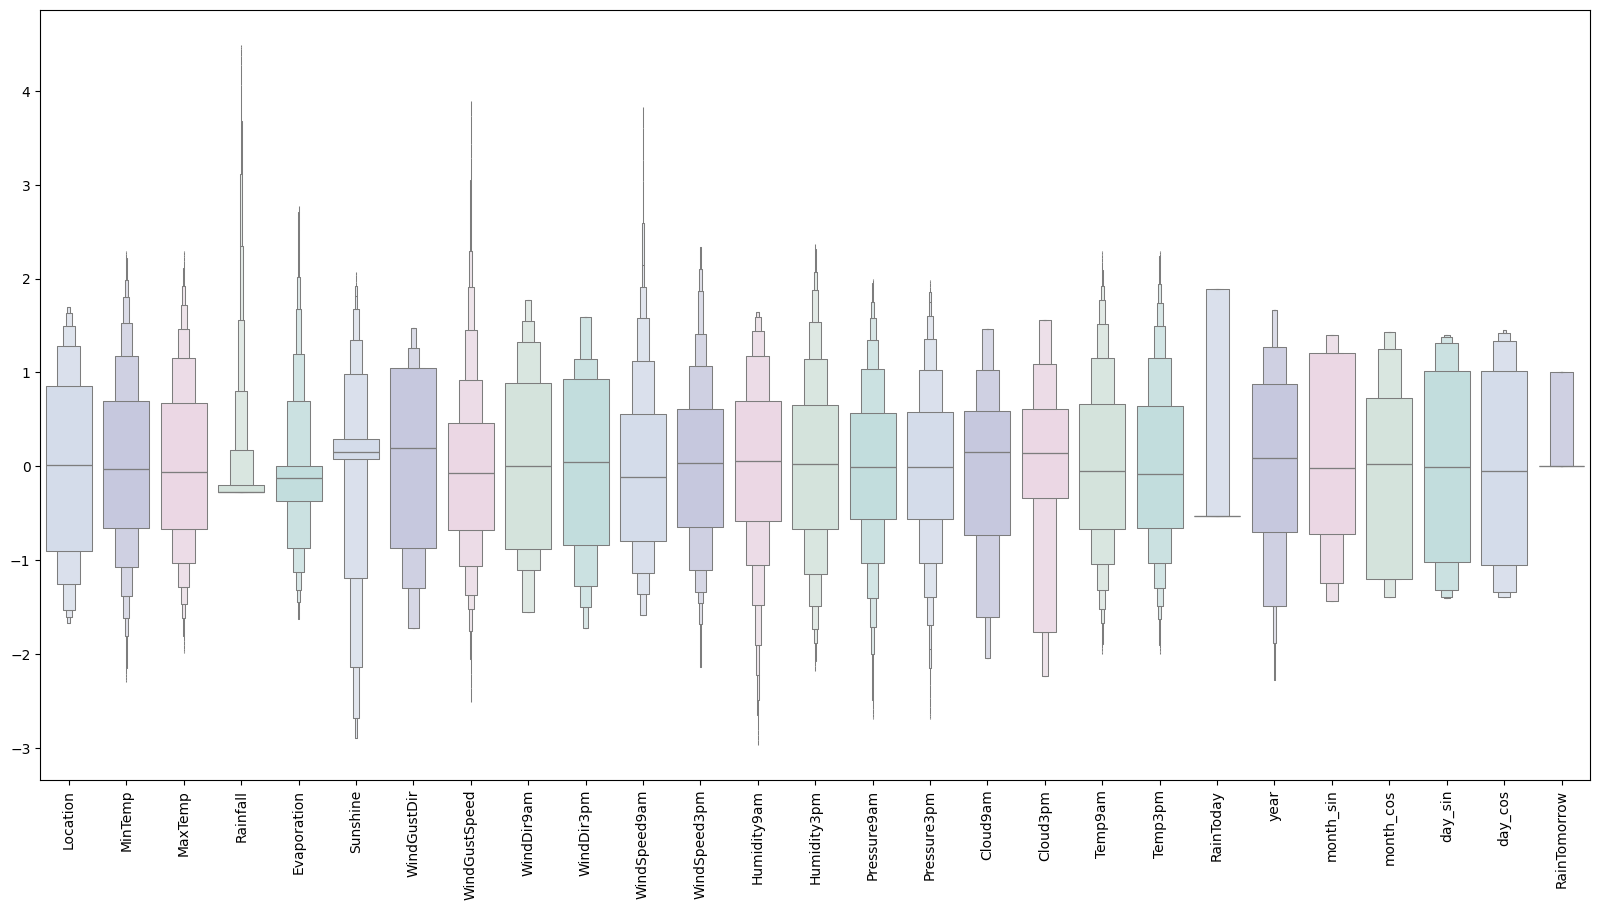

In [32]:
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

# Model Building
following steps are involved in the model building
- assigning X and y the status of attributes and tags
splitting test and training sets
- initializing the neural network
- defining by adding layers
- compiling the neural network
- train the neural network


In [33]:
X = features.drop(["RainTomorrow"], axis=1)
y = features["RainTomorrow"]

# Splitting test and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X.shape

(127536, 26)

### `EarlyStopping`
- 20 ÏóêÌè≠ Ïó∞ÏÜçÏúºÎ°ú ÏÑ±Îä• Ìñ•ÏÉÅ ÏóÜÏúºÎ©¥ ÌïôÏäµ Ï¢ÖÎ£å
- `min_delta=0.001`: ÏÑ±Îä• Ìñ•ÏÉÅÏù¥ ÏµúÏÜåÌïú Ïù¥ ÏàòÏπò Ïù¥ÏÉÅÏùº ÎïåÎßå ÏßÑÏßú Í∞úÏÑ†ÏúºÎ°ú Î¥Ñ
- `restore_best_weights=True`: Ï°∞Í∏∞ Ï¢ÖÎ£åÎêòÎçîÎùºÎèÑ Í∞ÄÏû• ÏÑ±Îä• Ï¢ãÏïòÎçò ÏßÄÏ†êÏùò Í∞ÄÏ§ëÏπò Î≥µÏõê

### Sequential Íµ¨Ï°∞
- Sequential : ÏàúÏ∞®Ï†ÅÏúºÎ°ú Î†àÏù¥Ïñ¥Î•º ÏåìÎäî Î™®Îç∏ Íµ¨Ï°∞
```python
model.add(Dense(units=32, activation='relu', input_dim=26))
```
  - Ï≤´ Î≤àÏß∏ ÏùÄÎãâÏ∏µ
  - 32Í∞úÏùò Îâ¥Îü∞, ReLU Ìï®Ïàò ÌôúÏÑ±Ìôî
  - ÏûÖÎ†• ÌäπÏÑ± ÏàòÎäî 26Í∞ú(X_train.shape[1] = 26)

```python
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
```
  - ÏùÄÎãâÏ∏µ Ï∂îÍ∞Ä + ÎìúÎ°≠ÏïÑÏõÉ(Í≥ºÏ†ÅÌï© Î∞©ÏßÄ)
  - Ï†êÏ†ê Ïú†ÎãõÏàòÎ•º Ï§ÑÏó¨Í∞ÄÎ©∞ Ï†ïÎ≥¥ ÏïïÏ∂ï

```python
model.add(Dense(1, activation='sigmoid'))
```
- Ï∂úÎ†•Ï∏µ
- sigmoidÎäî Ïù¥ÏßÑ Î∂ÑÎ•òÏö© -> ÌôïÎ•† Í∞í(0~1) Ï∂úÎ†•

### Ïª¥ÌååÏùº
```python
opt = Adam(learning_rate=0.00009)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
```
- ÏòµÌã∞ÎßàÏù¥Ï†Ä : Adam + ÎÇÆÏùÄ ÌïôÏäµÎ•†(0.00009)
- ÏÜêÏã§Ìï®Ïàò : `binary_crossentropy`(Ïù¥ÏßÑÎ∂ÑÎ•òÏö©)
- ÌèâÍ∞ÄÏßÄÌëú : accuracy

### Î™®Îç∏ ÌïôÏäµ
```python
history = model.fit(
    X_train, y_train,
    batch_size=32,
    epochs=150,
    validation_split=0.2,
    callbacks=[early_stopping]
)
```
- ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò 20%Î•º validation Îç∞Ïù¥ÌÑ∞Î°ú
- ÏµúÎåÄ 150 ÏóêÌè≠ ÎèåÎ¶¨Îêò Í∞úÏÑ† ÏóÜÏúºÎ©¥ Ï°∞Í∏∞ Ï¢ÖÎ£å
- Îß§ ÏóêÌè≠ÎßàÎã§ accuracy, val_accuracy Îì±ÏùÑ Í∏∞Î°ùÌï¥ÏÑú historyÏóê Ï†ÄÏû•


## Î™©Ìëú : Îî•Îü¨ÎãùÏúºÎ°ú Ïù¥ÏßÑ Î∂ÑÎ•ò
- Ïñ¥Îñ§ Îç∞Ïù¥ÌÑ∞Î•º Î≥¥Í≥† 1ÏùºÏßÄ, 0ÏùºÏßÄ(ÎÇ¥Ïùº ÎπÑÏò¨ÏßÄ ÏïàÏò¨ÏßÄ) ÏòàÏ∏°ÌïòÎäî Î™®Îç∏

#### STEP 1 : EarlyStopping(ÎÑàÎ¨¥ Ïò§Îûò ÌïôÏäµÌïòÎ©¥ Í≥ºÏ†ÅÌï©Ïù¥ ÏÉùÍ∏∞ÎãàÍπå Ïù¥Î•º Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï®)
- ÌïôÏäµÏù¥ Îçî Ïù¥ÏÉÅ ÏùòÎØ∏ ÏóÜÏùÑ Îïå ÏûêÎèôÏúºÎ°ú Î©àÏ∂îÎäî Ïû•Ïπò

#### STEP 2 : Sequential Î™®Îç∏ ÏãúÏûë
- Î†àÏù¥Ïñ¥Î•º ÏàúÏÑúÎåÄÎ°ú ÌïòÎÇòÏî© ÏåìÍ≤†Îã§Îäî ÏùòÎØ∏

#### STEP 3 : Î™®Îç∏ Î†àÏù¥Ïñ¥(Ïã†Í≤ΩÎßùÏ∏µ) Íµ¨ÏÑ±
- input_dim = 26 : ÏûÖÎ†• ÌäπÏÑ±Ïù¥ 26Í∞úÎùºÎäî Îúª(ex. ÎÇòÏù¥, Í∏∞Ïò®, ÏäµÎèÑ Îì±)
- Dense Îäî ÎÖ∏ÎìúÎ•º ÏåìÎäî Ï∏µ
- DropoutÏùÄ ÌïôÏäµ Ï§ë ÏùºÎ∂Ä ÎÖ∏ÎìúÎ•º ÏùºÏãúÏ†ÅÏúºÎ°ú Í∫ºÏÑú Í≥ºÏ†ÅÌï©ÏùÑ ÎßâÎäî Ïû•Ïπò
- sigmoid : Ìï≠ÏÉÅ Ï∂úÎ†•Ïù¥ 0~1 ÏÇ¨Ïù¥Ïù¥ÎØÄÎ°ú ÌôïÎ•†Ï≤òÎüº ÏÇ¨Ïö© Í∞ÄÎä•

#### STEP 4 : Î™®Îç∏ Ïª¥ÌååÏùº
- Adam : ÏöîÏ¶ò ÎßéÏù¥ Ïì∞Îäî Ïä§ÎßàÌä∏Ìïú ÌïôÏäµ Î∞©Î≤ï(optimizer)
- learning_rate = 0.00009 : ÌïôÏäµ ÏÜçÎèÑ(ÎÇÆÏùÑÏàòÎ°ù Ï≤úÏ≤úÌûà Î∞∞ÏõÄ)
- loss='binary_crossentropy' : Ïù¥ÏßÑ Î∂ÑÎ•ò Î¨∏Ï†úÏóêÏÑú ÏòàÏ∏°Ïù¥ ÏñºÎßàÎÇò ÌãÄÎ†∏ÎäîÏßÄ Ï∏°Ï†ïÌïòÎäî Ìï®Ïàò

#### STEP 5 : Î™®Îç∏ ÌïôÏäµ
- epochs=150 : ÏµúÎåÄ 150Î≤à Î∞òÎ≥µ ÌïôÏäµÌï¥Îùº
- batch_size=32 : Ìïú Î≤àÏóê 32Í∞úÏî© Îç∞Ïù¥ÌÑ∞Î•º Ï≤òÎ¶¨ÌïòÎ©¥ÏÑú ÌïôÏäµ


In [34]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

model = Sequential()

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 26))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 32, epochs = 150, callbacks=[early_stopping], validation_split=0.2)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
2551/2551 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17s 4ms/step - accuracy: 0.7858 - loss: 0.5681 - val_accuracy: 0.7860 - val_loss: 0.3959
Epoch 2/150
2551/2551 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 4ms/step - accuracy: 0.7854 - loss: 0.4296 - val_accuracy: 0.7860 - val_loss: 0.3894
Epoch 3/150
2551/2551 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19s 4ms/step - accuracy: 0.7844 - loss: 0.4250 - val_accuracy: 0.7860 - val_loss: 0.3882
Epoch 4/150
2551/2551 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9s 3ms/step - accuracy: 0.7848 - loss: 0.4180 - val_accuracy: 0.7860 - val_loss: 0.3861
Epoch 5/150
2551/2551 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 12s 4ms/step - accuracy: 0.7814 - loss: 0.4121 - val_accuracy: 0.7860 - val_loss: 0.3840
Epoch 6/150
2551/2551 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10s 4ms/step - accuracy: 0.7863 - loss: 0.4075 - val_accur

## plotting training and validation loss over epochs
Îî•Îü¨Îãù ÌïôÏäµ ÎèÑÏ§ëÏùò ÏÑ±Îä• Î≥ÄÌôî(ÏÜêÏã§Í∞í)ÏùÑ ÏãúÍ∞ÅÌôî
-> **Í≥ºÏ†ÅÌï© Ïó¨Î∂ÄÎÇò ÌïôÏäµ ÌùêÎ¶ÑÏùÑ ÌôïÏù∏**

> epoch(ÌïôÏäµÎ∞òÎ≥µ) Ïóê Îî∞Îùº
> - Training loss(ÌïôÏäµÏóê ÎåÄÌïú Ïò§Ï∞®)
> - Validation loss(Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú Ïò§Ï∞®)
>
> Ïù¥ ÎëòÏù¥ Ïñ¥ÎñªÍ≤å Î≥ÄÌôîÌñàÎäîÏßÄÎ•º ÏãúÍ∞ÅÌôîÌï¥ÏÑú Ïñ∏Ï†ú ÌïôÏäµÏù¥ Î©àÏ∑ÑÍ≥† Í≥ºÏ†ÅÌï©Ïù¥ ÏûàÏóàÎäîÏßÄ ÌôïÏù∏

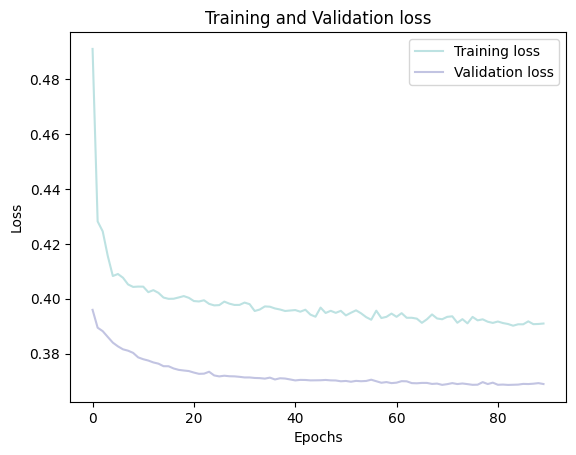

In [35]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

Í∑∏ÎûòÌîÑ Ìï¥ÏÑù
- xÏ∂ï(Epochs) : ÌïôÏäµ Î∞òÎ≥µ ÌöüÏàò
- yÏ∂ï(Loss) : ÏÜêÏã§Í∞í

> - 0 ~ 10 ÏóêÌè≠ : lossÍ∞Ä Í∏âÍ≤©Ìûà Í∞êÏÜå -> Î™®Îç∏Ïù¥ Îπ†Î•¥Í≤å ÌïôÏäµ Ï§ë
>
> - 10~90 ÏóêÌè≠ : loss, val_loss Î™®Îëê Ï≤úÏ≤úÌûà Í∞êÏÜåÌïòÎ©∞ ÏïàÏ†ïÌôî
>
> - Ï†ÑÎ∞òÏ†Å ÌòïÌÉú : val_lossÍ∞Ä loss Î≥¥Îã§ Ìï≠ÏÉÅ ÎÇÆÍ≥†, Í≥ÑÏÜç Í∞êÏÜå
>
> - Í≥ºÏ†ÅÌï© Ïó¨Î∂Ä : val_lossÍ∞Ä Ï¶ùÍ∞ÄÌïòÎäî Íµ¨Í∞ÑÏù¥ ÏóÜÏúºÎØÄÎ°ú ÏóÜÏùå -> ÌïôÏäµÏù¥ ÏûòÎêòÏóàÎã§Îäî Îúª
>
> - earlystoppingÏù¥ Ïûò Ï†ÅÏö©ÎêòÏñ¥ Ï†ÅÏ†àÌïú ÏãúÏ†ê(ÏïΩ 90Ìöå)ÏóêÏÑú Î©àÏ∂ò ÎìØ Î≥¥ÏûÑ

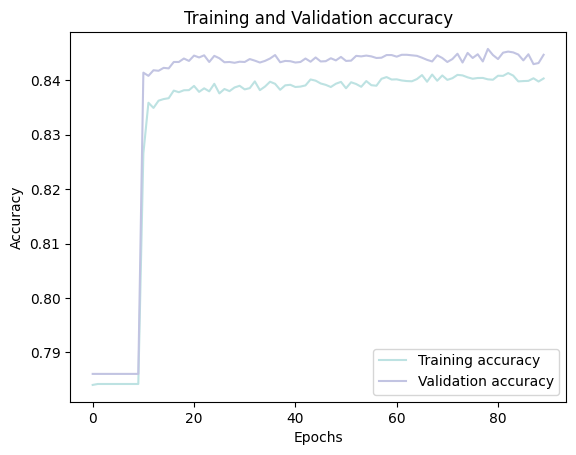

In [36]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Í∑∏ÎûòÌîÑ Ìï¥ÏÑù
- training/validation accuracy Î™®Îëê Ï†ïÌôïÎèÑ Ï†ÅÏ†à
- Î≥¥ÌÜµÏùÄ trainingÏù¥ validation Î≥¥Îã§ ÎÜíÏùÄÎç∞, Ïó¨Í∏∞ÏÑ† Î∞òÎåÄ -> ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Ïóê ÏïΩÍ∞Ñ Î∂ÄÏ°±ÌïòÍ≤å Ï†ÅÏùëÌñàÏùÑ ÏàòÎèÑ ÏûàÍ≥†, Ïò§ÌûàÎ†§ Ï¢ãÏùÄ ÏùºÎ∞òÌôîÎùºÍ≥† Î≥º ÏàòÎèÑ ÏûàÏùå

# Conclusion
Concluding the model with:
- Testing on the test set
- Evaluating the confusion matrix
- Evaluating the classification report

In [37]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

798/798 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 2ms/step


<Axes: >

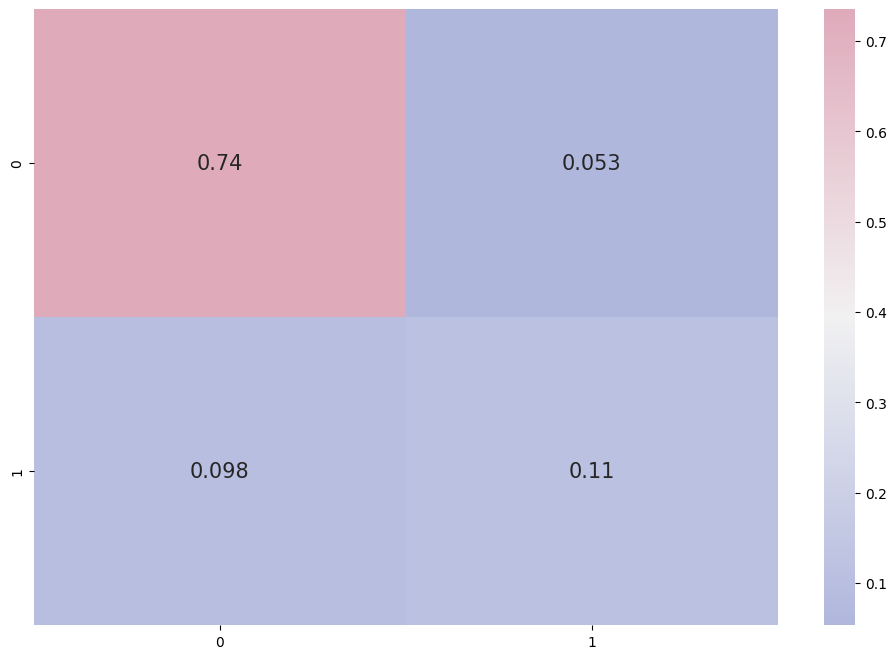

In [38]:
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     20110
           1       0.68      0.54      0.60      5398

    accuracy                           0.85     25508
   macro avg       0.78      0.73      0.75     25508
weighted avg       0.84      0.85      0.84     25508



TN : Ïã§Ï†ú 0Ïù¥Í≥† 0ÏúºÎ°ú ÎßûÏ∂§(Ï†ïÌôïÌïòÍ≤å no ÏòàÏ∏°) -> 74%

FP : Ïã§Ï†ú 0Ïù∏Îç∞ 1Î°ú ÌãÄÎ¶º(Í≥ºÏûâ ÏòàÏ∏°) -> 5.3%

FN : Ïã§Ï†ú 1Ïù∏Îç∞ 0ÏúºÎ°ú ÌãÄÎ¶º -> 9.8%  

TP : Ïã§Ï†ú 1Ïù¥Í≥† 1Î°ú ÎßûÏ∂§(Ï†ïÌôïÌïòÍ≤å yes ÏòàÏ∏°) -> 11%

- Precision(1Ïù¥ÎùºÍ≥† ÏòàÏ∏°Ìïú Í≤É Ï§ë ÏßÑÏßú 1Ïù∏ ÎπÑÏú®) : ÏòàÏ∏°Ïù¥ ÏñºÎßàÎÇò Ï†ïÌôïÌñàÎÇò
- Recall(ÏßÑÏßú 1Ïù∏ Í≤É Ï§ë Î™®Îç∏Ïù¥ Ïûò ÎßûÏ∂ò ÎπÑÏú®) : ÎÜìÏπòÏßÄ ÏïäÍ≥† Ïûò Ïû°ÏïòÎÇò
- F1-score : Precision Í≥º Recall Ïùò ÌèâÍ∑† = Í∑†Ìòï ÌèâÍ∞Ä ÏßÄÌëú
- Support : Í∞Å ÌÅ¥ÎûòÏä§Ïùò Ïã§Ï†ú Í∞úÏàò
- macro avg : Îã®Ïàú ÌèâÍ∑† -> Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú class 1Ïùò ÏÑ±Îä•Ïù¥ ÎÇÆÏïÑ ÌèâÍ∑†ÎèÑ ÎÇÆÏïÑÏßê
- weighted avg -> classÎ≥Ñ ÏÉòÌîå Ïàò Î∞òÏòÅ ÌèâÍ∑† -> Ï†ÑÏ≤¥Ï†ÅÏúºÎ°ú 0.84wÏ†ïÎèÑÏùò ÏÑ±Îä•
---
üîç Í≤∞Î°†
- ÌÅ¥ÎûòÏä§Ïùò Î∂àÍ∑†ÌòïÏù¥ ÏûàÏùå(0Ïù¥ Ìõ®Ïî¨ ÎßéÏùå)
- Î™®Îç∏ÏùÄ 0ÏùÄ Ïûò ÏòàÏ∏°, 1ÏùÄ Îã§ÏÜå ÎÜìÏπ®
- Recall Ïù¥ ÎÇÆÏùÄ ÌÅ¥ÎûòÏä§ 1 -> ÏòàÏ∏° ÎØºÍ∞êÎèÑ Îçî ÌïÑÏöî
  - Í∞úÏÑ† Ï†úÏïà : oversampling, class weight Ï°∞Ï†ï, threshold ÌäúÎãù Îì±


